In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
df = pd.DataFrame(raw_df, columns=column_names)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [3]:
boston_data = df.drop(['MEDV'],axis=1)
boston_target = df['MEDV']

## Шаг 1. Строим самую простую модель

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 

X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, random_state=1)

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

sc_train = knn.score(X_train , y_train)
sc_test = knn.score(X_test , y_test)


print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.716
тестовый: 0.585


## Шаг 2. Проводим препроцессинг (пересмасштабирование) данных

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, random_state=1)

scaler = MinMaxScaler() 
# находим функцию масштабирования
scaler.fit(X_train) # Перемасштабирование ТОЛЬКО на ТРЕНИРОВОЧНОМ наборе,  


X_train_scaled = scaler.transform(X_train) # перемасштабировали тренировочный набор
X_test_scaled = scaler.transform(X_test)   # перемасштабировали тестовый набор


knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

sc_train = knn.score(X_train_scaled , y_train)
sc_test =  knn.score(X_test_scaled ,  y_test)

print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.841
тестовый: 0.781


## Шаг 2.5 Посмотрим метрики результатов
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, random_state=1)

scaler = MinMaxScaler() 
# находим функцию масштабирования
scaler.fit(X_train) # Перемасштабирование ТОЛЬКО на ТРЕНИРОВОЦНОМ наборе,  


X_train_scaled = scaler.transform(X_train) # перемасштабировали тренировочный набор
X_test_scaled = scaler.transform(X_test)   # перемасштабировали тестовый набор

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# предскажем значение тренировочный и тестовых y
y_pred_train=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

# Проверим тренировочный набор (не всегда нужно делать)
print('тренировочный R^2: {:.3f}'.format( r2_score(y_train,y_pred_train) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тренировочный MSE: {:.3f}'.format( mean_squared_error(y_train,y_pred_train) ) ) 

# Проверим тренировочный набор (не всегда нужно делать)
print('тестовый R^2: {:.3f}'.format( r2_score(y_test,y_pred) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тестовый MSE: {:.3f}'.format( mean_squared_error(y_test,y_pred) ) ) 


тренировочный R^2: 0.841
тренировочный MSE: 12.637
тестовый R^2: 0.781
тестовый MSE: 21.691


## Шаг 3. Добавим поиск оптимального параметра

[1.    0.93  0.879 0.848 0.804 0.785 0.774 0.75  0.727]
[0.705 0.784 0.735 0.716 0.685 0.699 0.725 0.732 0.723]
[25.938 19.004 23.263 24.94  27.718 26.5   24.146 23.608 24.38 ]


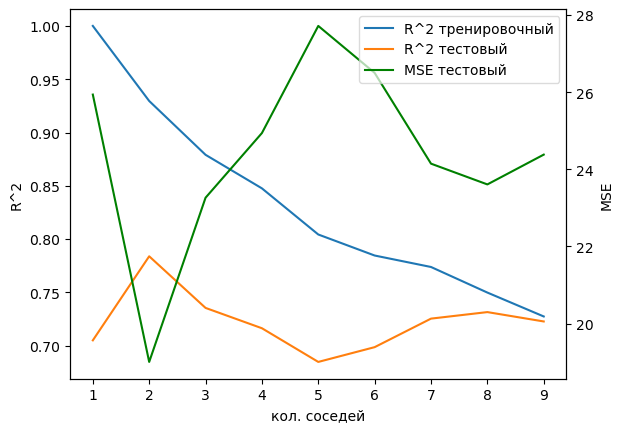

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, random_state=12) # 1, 12, 100

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

sc_train=[]
sc_test=[]
sc_train_mse=[]
sc_test_mse=[]

ran=range(1,10)

for r in ran:
    knn = KNeighborsRegressor(n_neighbors=r)
    knn.fit(X_train_scaled, y_train)
    sc_train=np.append(sc_train,knn.score(X_train_scaled ,y_train))
    sc_test=np.append(sc_test, knn.score(X_test_scaled ,y_test)) 
    y_pred=knn.predict(X_test_scaled)
    sc_test_mse=np.append(sc_test_mse,  mean_squared_error (y_test, y_pred)   )
    
np.set_printoptions(precision=3)
print(sc_train)
print(sc_test)
print(sc_test_mse)

fig, ax1 = plt.subplots()
ax1.plot(ran,sc_train, label= 'R^2 тренировочный')
ax1.plot(ran,sc_test, label= 'R^2 тестовый')
ax1.set_xlabel('кол. соседей')
ax1.set_ylabel('R^2')
ax2 = ax1.twinx()
ax2.plot(ran,sc_test_mse,'-g', label= 'MSE тестовый')
ax2.set_ylabel('MSE') #  СКО - среднеквадрат ошибка  или MSE - mean squared error

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes, framealpha=0.7)
plt.show()

## Итоговый шаг. Строим коннтейнеры

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, random_state=12, test_size=0.2)

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsRegressor())])

n_neighbors=[1, 2, 3, 4, 5]
p=[1, 2, 3, 4, 6, 8, 10]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()], 
     'classifier': [KNeighborsRegressor()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier': KNeighborsRegressor(n_neighbors=4, p=1, weights='distance'), 'classifier__n_neighbors': 4, 'classifier__p': 1, 'classifier__weights': 'distance', 'preprocessing': RobustScaler()}

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.784593

Правильность для наилучшей модели на тестовом наборе: 0.848867



,131,173,88,130,172,128,94,184,85,89,...,62,14,17,74,11,8,32,35,41,38
mean_fit_time,0.007016,0.006134,0.00416,0.004452,0.003747,0.007207,0.004911,0.00389,0.004952,0.008747,...,0.005815,0.006002,0.006756,0.006772,0.005994,0.005904,0.005894,0.005887,0.005881,0.005907
std_fit_time,0.00018,0.00018,0.000295,0.000285,0.000081,0.000669,0.001049,0.000133,0.001226,0.001431,...,0.000034,0.000194,0.001651,0.000631,0.000187,0.000107,0.000103,0.00013,0.000067,0.000078
mean_score_time,0.002773,0.002504,0.002811,0.002977,0.002456,0.002818,0.002674,0.004775,0.003776,0.003222,...,0.004002,0.003918,0.004039,0.00451,0.002334,0.002261,0.003802,0.003836,0.003889,0.00382
std_score_time,0.000149,0.000086,0.000449,0.000594,0.00008,0.000326,0.000317,0.000322,0.001649,0.000721,...,0.000333,0.000398,0.000437,0.000436,0.000088,0.000052,0.000252,0.000255,0.000321,0.000239
param_classifier,"KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...",...,"KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight...","KNeighborsRegressor(n_neighbors=4, p=1, weight..."
param_classifier__n_neighbors,4,5,3,4,5,4,3,5,3,3,...,2,1,1,2,1,1,1,1,1,1
param_classifier__p,1,1,1,1,1,1,2,3,1,1,...,4,3,3,8,2,2,8,8,10,10
param_classifier__weights,distance,distance,distance,distance,distance,uniform,distance,distance,uniform,distance,...,uniform,uniform,distance,uniform,distance,uniform,uniform,distance,distance,uniform
param_preprocessing,RobustScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),...,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
params,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...,{'classifier': KNeighborsRegressor(n_neighbors...


In [9]:
grid.best_params_

{'classifier': KNeighborsRegressor(n_neighbors=4, p=1, weights='distance'),
 'classifier__n_neighbors': 4,
 'classifier__p': 1,
 'classifier__weights': 'distance',
 'preprocessing': RobustScaler()}

In [10]:
pipe = Pipeline([('preprocessing', RobustScaler()), 
                 ('classifier', KNeighborsRegressor(n_neighbors=4, p=1, weights='distance'))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred

array([22.02 , 15.085,  6.87 , 28.858, 29.038, 21.633, 16.651, 37.69 ,
       29.612, 21.756, 21.056, 24.614, 21.59 , 20.695, 35.216, 46.431,
       14.896, 22.237, 20.223, 24.561, 27.431, 19.669, 21.896, 12.145,
       25.993, 20.24 , 20.411, 13.583, 21.448, 45.71 , 24.535, 24.854,
       16.671, 31.077, 43.587, 11.746, 20.793, 44.613, 17.023, 23.037,
       18.549, 24.842, 23.161, 31.21 , 19.122, 19.652, 20.702, 28.177,
       47.867, 24.636, 33.604, 19.638, 13.446, 23.518, 15.247, 18.305,
       21.496, 20.258, 13.291, 14.989, 16.823, 31.834, 19.117, 18.41 ,
       17.094, 26.27 , 23.304, 13.557, 21.052, 42.657, 15.959, 12.884,
       20.846, 19.693, 16.585, 17.037, 22.52 ,  9.292, 21.83 , 35.919,
       11.707, 19.72 , 33.348, 17.751, 11.744, 19.2  , 25.518, 16.911,
       20.476, 16.943, 21.001, 18.082, 26.76 , 18.103, 32.771, 20.752,
       24.481, 14.667, 36.905, 13.941, 31.551, 21.119])

In [11]:
pipe.score(X_train, y_train)

1.0

In [12]:
pipe.score(X_test, y_test)

0.8488665505328123